######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3b235">Word2Vec and TF-IDF
<font color=darkblue>

- 1. <a href = #link1>Create a Doc2Vec model that represents words and documents into numerical vectors</a>
- 2. <a href = #link2>Find words related to other words</a>
- 3. <a href = #link3>Find the document that has the closest meaning to a list of key words like in a search engine</a>
- 4. <a href = #link4>Create a TF-IDF search engine</a>    

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#d40eea">Import Libraries
<font color=darkblue>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import Doc2Vec
from collections import namedtuple
import gensim.utils
from langdetect import detect
import re
import string

/home/jayanthikishore/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#b0c335">Load and explore the dataset
<font color=darkblue>

In [4]:
imdbdata=pd.read_csv('/home/jayanthikishore/Downloads/doc2vec/tutorials/movies.csv')
data = np.array(imdbdata.overview)
titles=np.array(imdbdata.original_title)

imdbdata.head()


,overview,original_title
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,When siblings Judy and Peter discover an encha...,Jumanji
2,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,Father of the Bride Part II


######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#3546c3">Preprocessing the text data
<font color=darkblue>

In [5]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags title original_number')
n=0
alldocs = []  # Will hold all docs in original order

regex = re.compile('[%s]' % re.escape(string.punctuation)) #to remove punctuation

for line_no, line in enumerate(data):
    if (type(line)==str):
        if (len(line)>150):
            if (detect(line) == 'en') :
                line = regex.sub('', line)
                tokens = gensim.utils.to_unicode(line).lower().split()
                words = tokens[0:]
                tags = [n]
                title = titles[line_no]
                alldocs.append(SentimentDocument(words, tags, title, line_no))
                n=n+1


######  <span style="font-family: Arial; font-weight:bold;font-size:1.15em;color:#a435c3">Some insights of the dataset:
<font color=darkblue>

Number of Documents :  34178
Mean length of documents :  65.90962022353561


Text(0, 0.5, 'Length of the description')

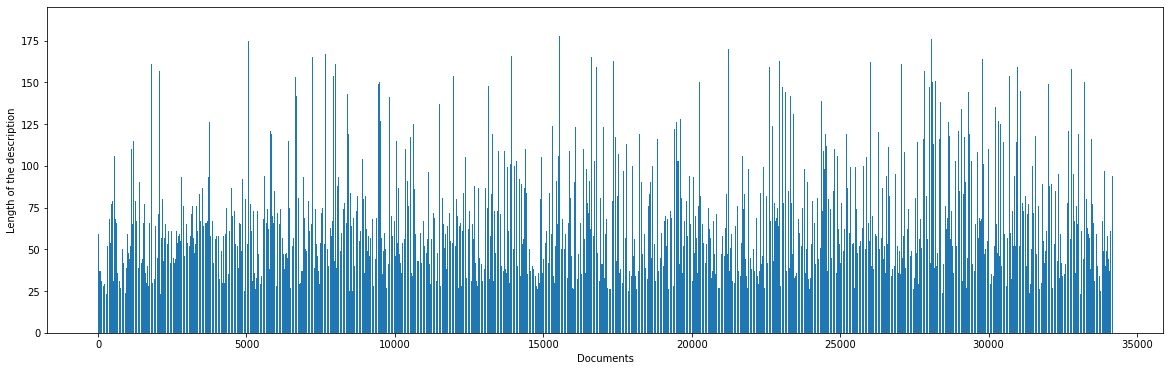

In [6]:
l = []
for doc in alldocs:
    l.append(len(doc.words))

print('Number of Documents : ', len(alldocs))
print('Mean length of documents : ', np.mean(l))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(l)), l)
plt.xlabel('Documents')
plt.ylabel('Length of the description')


######  <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#a435c3">Doc2Vec model:
<font color=darkblue>
<br>
-  The vectors will be of size 300 and the window size is 10. We are ignoring words count that are less than 10 times in the entire corpus.
    
- <a href = #link1>gensim : https://radimrehurek.com/gensim/ </a>
- <a href = #link2>Doc2Vec : https://radimrehurek.com/gensim/models/doc2vec.html </a>
- <a href = #link3>A great article introducing the concepts behind Doc2Vec : https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e </a> 
- <a href = #link3>Detailed scientific paper : https://cs.stanford.edu/~quocle/paragraph_vector.pdf </a>   

In [7]:
# An example of how the list alldocs is build

index = 0
doc = alldocs[index]
print(doc, '\n')
print(data[doc.original_number])

SentimentDocument(words=['led', 'by', 'woody', 'andys', 'toys', 'live', 'happily', 'in', 'his', 'room', 'until', 'andys', 'birthday', 'brings', 'buzz', 'lightyear', 'onto', 'the', 'scene', 'afraid', 'of', 'losing', 'his', 'place', 'in', 'andys', 'heart', 'woody', 'plots', 'against', 'buzz', 'but', 'when', 'circumstances', 'separate', 'buzz', 'and', 'woody', 'from', 'their', 'owner', 'the', 'duo', 'eventually', 'learns', 'to', 'put', 'aside', 'their', 'differences'], tags=[0], title='Toy Story', original_number=0) 

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


In [9]:
# PV-DM
model = Doc2Vec(dm=1, vector_size=300,window=10,hs=0,min_count=10,dbow_words=1,sample=1e-5)

# build the vocabulary 
model.build_vocab(alldocs)


In [10]:
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

In [11]:
# model.save("/home/jayanthikishore/Downloads/model")
#Doc2Vec.load("model")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.15em;color:#a435c3">Evaluating words embedding
<font color=darkblue>

In [12]:
model.wv.most_similar_cosmul(positive = ["love"])

[('madly', 0.8194813132286072),
 ('falls', 0.81402987241745),
 ('fall', 0.8048554062843323),
 ('falling', 0.7534124255180359),
 ('unrequited', 0.7526795864105225),
 ('triangle', 0.7506674528121948),
 ('passionately', 0.74207603931427),
 ('starcrossed', 0.7316624522209167),
 ('heartbreak', 0.7296435832977295),
 ('hopelessly', 0.7226974964141846)]

In [13]:
model.wv.most_similar_cosmul(positive = ["war"])

[('ii', 0.8962222337722778),
 ('trenches', 0.8318049907684326),
 ('civil', 0.8221935033798218),
 ('gis', 0.8205772638320923),
 ('vietnam', 0.8036419749259949),
 ('frontline', 0.8030383586883545),
 ('ww', 0.8027049899101257),
 ('infantry', 0.794455349445343),
 ('rages', 0.7940611243247986),
 ('partisan', 0.7846501469612122)]

In [14]:
model.wv.most_similar_cosmul(positive = ["space"])

[('outer', 0.8890290260314941),
 ('mars', 0.8748528361320496),
 ('planet', 0.8673110604286194),
 ('astronaut', 0.8645124435424805),
 ('astronauts', 0.8616443872451782),
 ('nasa', 0.8566944599151611),
 ('asteroid', 0.8562235832214355),
 ('spacecraft', 0.8482164144515991),
 ('earth', 0.8451465964317322),
 ('spaceship', 0.8404451608657837)]

In [15]:
model.wv.most_similar_cosmul(negative = ["man"], positive = ["king","woman"])


[('queen', 0.8273528814315796),
 ('empress', 0.8262735605239868),
 ('throne', 0.8220264315605164),
 ('princess', 0.8130974173545837),
 ('palace', 0.808713972568512),
 ('prince', 0.7921130657196045),
 ('dartagnan', 0.7826076149940491),
 ('pauline', 0.7781083583831787),
 ('crowned', 0.7762027978897095),
 ('goddess', 0.7751016616821289)]

######  <span style="font-family: Arial; font-weight:bold;font-size:1.15em;color:#a435c3">Evaluating documents embedding
<font color=darkblue>

In [16]:
# Closest document to the word "war"

tokens = "war"

new_vector = model.infer_vector(tokens.split() ,alpha=0.001 ,steps = 5)
tagsim = model.docvecs.most_similar([new_vector])[0]

docsim = alldocs[tagsim[0] ]

print("Document : ", data[docsim.original_number], "\n")
print("Titre : ", docsim.title)
print("Distance : ", tagsim[1])

Document :  The story Jewish counterfeiter, Salomon Sorowitsch, coerced into assisting the Nazi operation of the Sachsenhausen concentration camp during World War II. 

Titre :  Die Fälscher
Distance :  0.8707342743873596


<ipython-input-16-7ae03a6fa9de>:6: DeprecationWarning:

Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).



In [19]:
# Closest document to the word "love"

tokens = "love"

new_vector = model.infer_vector(tokens.split() ,alpha=0.001 ,steps = 5)
sims = model.docvecs.most_similar([new_vector], topn=1) # get *all* similar documents

print("Most : " , data[alldocs[sims[0][0]].original_number], "\n") 
print("Median : " , data[alldocs[sims[17000][0]].original_number], "\n")
print("Least : " , data[alldocs[sims[-1][0]].original_number])



Most :  A fantasy film with horror elements, "The Tale of Tales" is loosely inspired by the 17th century collection of fairy tales of the same name by Italian writer Giambattista Basile. 



<ipython-input-19-a8004e5de420>:6: DeprecationWarning:

Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).



######  <span style="font-family: Arial; font-weight:bold;font-size:1.15em;color:#a435c3">Creating the TF-IDF model
<font color=darkblue>
  
- We create the TF-IDF model from the list alldocs with the module TfidfModel from gensim.
- gensim : https://radimrehurek.com/gensim/ 
- Tf-Idf : https://radimrehurek.com/gensim/models/tfidfmodel.html 

In [21]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim import similarities 

dct = Dictionary(doc.words for doc in alldocs)  # fit dictionary
corpus = [dct.doc2bow(line.words) for line in alldocs]  # convert dataset to BoW format
model_tfidf = TfidfModel(corpus)  # fit model

In [22]:
# for example 
 
index = 0
print("Document ",index, " : ", data[alldocs[index].original_number] ) 
print("Bag of words representation of document ", index, " : ", corpus[index])

Document  0  :  Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.
Bag of words representation of document  0  :  [(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 3)]


#####  <span style="font-family: Arial; font-weight:bold;font-size:1.15em;color:#a435c3">Creating Similarity matrix between a list of key words and all the documents
<font color=darkblue>

In [23]:
#Create similarity matrix between doc and tokens
tokens = "love".split()
index = similarities.MatrixSimilarity([dct.doc2bow(tokens)],num_features=len(dct))

In [24]:
similarity=np.zeros((len(alldocs)))
maxsim = 0
for id, doc in enumerate(alldocs):
    similarity[id] = index[dct.doc2bow(doc.words)]
    
docsim= alldocs[np.argmax(similarity)] 
print(data[docsim.original_number])
print(tagsim)
print(docsim.title)


Out of Love encapsulates the sweltering and devastating dynamics of love in the turbulent relationship between Varya and Nikolai, where genuine love and hope contend with destruction and despair.
(9959, 0.8707342743873596)
Out of Love
